In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [2]:
def create_model_results(model, mr, recall, precision, f1_score, auc_score):
    model_results = {
        'model': model,
        'MR': mr,
        'recall': recall,
        'precision': precision,
        'f1_score': f1_score,
        'auc_score': auc_score
    }
    return model_results

results = []

# #1

In [3]:
df = pd.read_csv('/Users/brianoktavec/MSC550/Assignment_9/BankCustomerChurnPrediction_revised-1.csv')

In [4]:
df.head()

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,42,2,0.00,1,1,1,101348.88,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,39,1,0.00,2,0,0,93826.63,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0


# #2

In [5]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1:]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 0)

In [6]:
model=sm.Logit(y_train, sm.add_constant(x_train))
lr = model.fit()
print(lr.summary())

Optimization terminated successfully.
         Current function value: 0.436842
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7990
Method:                           MLE   Df Model:                            9
Date:                Sun, 16 Apr 2023   Pseudo R-squ.:                  0.1365
Time:                        15:31:27   Log-Likelihood:                -3494.7
converged:                       True   LL-Null:                       -4047.2
Covariance Type:            nonrobust   LLR p-value:                4.079e-232
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.2910      0.269    -12.219      0.000      -3.819      -2.763
credit_scor

In [7]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, auc, average_precision_score, f1_score

p_pred = lr.predict(sm.add_constant(x_test))
y_pred = round(p_pred)

y_pred_threshold = [1 if x >= 0.5 else 0 for x in y_pred]
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_threshold).ravel()

mr1 = (fp + fn) / (tn + fp + fn + tp)
r1 = tp/(tp+fn)
p1 = tp/(tp+fp)
f1_1 = f1_score(y_test, y_pred_threshold)



print("MR:", mr1)
print("Recall:", r1)
print("Precision:", p1)
print("F1 Score:", f1_1)

MR: 0.191
Recall: 0.18024691358024691
Precision: 0.5934959349593496
F1 Score: 0.27651515151515155


AUC for precision-recall curve: 0.4574254127398719
AP score: 0.45917693323463676


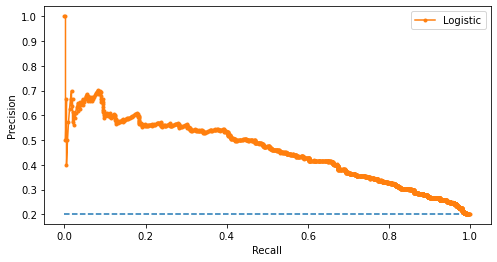

In [8]:
mr_precision = np.mean(y_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, p_pred)


plt.figure(figsize=(8,4))
plt.plot([0, 1], [mr_precision, mr_precision], linestyle='--')
plt.plot(lr_recall, lr_precision, marker='.', label = 'Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

auc1 = auc(lr_recall, lr_precision)

results1 = create_model_results('model1', mr1, r1, p1, f1_1, auc1)
results.append(results1)

print("AUC for precision-recall curve:", auc1)
print("AP score:", average_precision_score(y_test, p_pred))

# #3

In [9]:
pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in /Users/brianoktavec/opt/anaconda3/lib/python3.8/site-packages (0.10.1)
Note: you may need to restart the kernel to use updated packages.


In [10]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority', random_state = 0)
x_train_under, y_train_under = undersample.fit_resample(x_train, y_train)

In [11]:
model2 = sm.Logit(y_train_under, sm.add_constant(x_train_under))
lr2 = model2.fit()
print(lr2.summary())

Optimization terminated successfully.
         Current function value: 0.591984
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 3264
Model:                          Logit   Df Residuals:                     3254
Method:                           MLE   Df Model:                            9
Date:                Sun, 16 Apr 2023   Pseudo R-squ.:                  0.1459
Time:                        15:31:30   Log-Likelihood:                -1932.2
converged:                       True   LL-Null:                       -2262.4
Covariance Type:            nonrobust   LLR p-value:                2.250e-136
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -2.1884      0.351     -6.227      0.000      -2.877      -1.500
credit_scor

In [12]:
p_pred2 = lr2.predict(sm.add_constant(x_test))
y_pred2 = round(p_pred2)

y_pred_threshold2 = [1 if x >= 0.5 else 0 for x in y_pred2]
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_threshold2).ravel()

mr2 = (fp + fn) / (tn + fp + fn + tp)
r2 = tp/(tp+fn)
p2 = tp/(tp+fp)
f1_2 = f1_score(y_test, y_pred_threshold2)

print("MR:", mr2)
print("Recall:", r2)
print("Precision:", p2)
print("F1 Score:", f1_2)

MR: 0.294
Recall: 0.7160493827160493
Precision: 0.3800786369593709
F1 Score: 0.49657534246575347


AUC for precision-recall curve: 0.44129085569101406
AP score: 0.44350855825781976


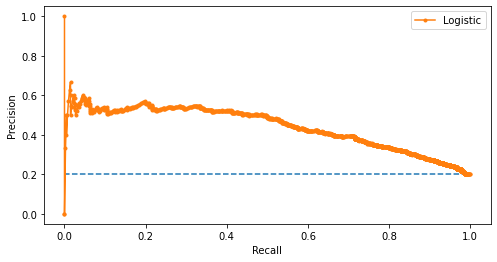

In [13]:
mr_precision = np.mean(y_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, p_pred2)


plt.figure(figsize=(8,4))
plt.plot([0, 1], [mr_precision, mr_precision], linestyle='--')
plt.plot(lr_recall, lr_precision, marker='.', label = 'Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

auc2 = auc(lr_recall, lr_precision)

results2 = create_model_results('model2', mr2, r2, p2, f1_2, auc2)
results.append(results2)

print("AUC for precision-recall curve:", auc2)
print("AP score:", average_precision_score(y_test, p_pred2))

# #4

In [14]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority', random_state = 0)
x_train_over, y_train_over = oversample.fit_resample(x_train, y_train)

In [15]:
model3 = sm.Logit(y_train_over, sm.add_constant(x_train_over))
lr3 = model3.fit()
print(lr3.summary())

Optimization terminated successfully.
         Current function value: 0.584360
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                12736
Model:                          Logit   Df Residuals:                    12726
Method:                           MLE   Df Model:                            9
Date:                Sun, 16 Apr 2023   Pseudo R-squ.:                  0.1569
Time:                        15:31:30   Log-Likelihood:                -7442.4
converged:                       True   LL-Null:                       -8827.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -2.3208      0.179    -12.991      0.000      -2.671      -1.971
credit_scor

In [16]:
p_pred3 = lr3.predict(sm.add_constant(x_test))
y_pred3 = round(p_pred3)

y_pred_threshold3 = [1 if x >= 0.5 else 0 for x in y_pred3]
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_threshold3).ravel()

mr3 = (fp + fn) / (tn + fp + fn + tp)
r3 = tp/(tp+fn)
p3 = tp/(tp+fp)
f1_3 = f1_score(y_test, y_pred_threshold3)

print("MR:", mr3)
print("Recall:", r3)
print("Precision:", p3)
print("F1 Score:", f1_3)

MR: 0.2955
Recall: 0.7185185185185186
Precision: 0.37890625
F1 Score: 0.4961636828644501


AUC for precision-recall curve: 0.4414257571378078
AP score: 0.44364258243648835


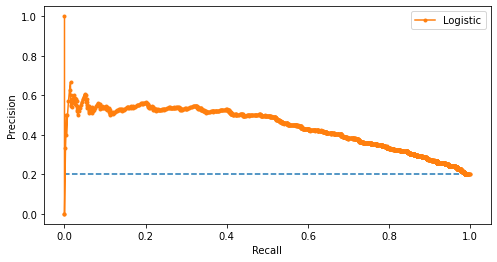

In [17]:
mr_precision = np.mean(y_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, p_pred3)


plt.figure(figsize=(8,4))
plt.plot([0, 1], [mr_precision, mr_precision], linestyle='--')
plt.plot(lr_recall, lr_precision, marker='.', label = 'Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

auc3 = auc(lr_recall, lr_precision)

results3 = create_model_results('model3', mr3, r3, p3, f1_3, auc3)
results.append(results3)

print("AUC for precision-recall curve:", auc3)
print("AP score:", average_precision_score(y_test, p_pred3))

# #5

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model4 = LogisticRegression(solver='newton-cg', max_iter=1000, class_weight='balanced')

lr4 = model4.fit(x_train,y_train.values.ravel())
print(lr4.coef_)
print(lr4.intercept_)
print(lr4.predict(x_test))
print(metrics.accuracy_score(y_test, lr4.predict(x_test)))

/Users/brianoktavec/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/brianoktavec/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[[-7.08999976e-04 -5.77550630e-01  7.86325042e-02 -2.62661655e-02
   5.16809037e-06 -8.10990216e-02 -3.77173405e-02 -8.82529022e-01
   4.77585804e-07]]
[-2.24915946]
[0 1 0 ... 1 0 0]
0.703


/Users/brianoktavec/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Users/brianoktavec/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


In [19]:
y_pred4 = lr4.predict(x_test)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred4).ravel()

y_pred_threshold4 = [1 if x >= 0.5 else 0 for x in y_pred4]
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_threshold4).ravel()

mr4 = (fp + fn) / (tn + fp + fn + tp)
r4 = tp/(tp+fn)
p4 = tp/(tp+fp)
f1_4 = f1_score(y_test, y_pred4)


print("MR:", mr4 )
print("Recall:", r4)
print("Precision:", p4)
print("F1 Score:", f1_4)

MR: 0.297
Recall: 0.7185185185185186
Precision: 0.377431906614786
F1 Score: 0.49489795918367346


AUC for precision-recall curve: 0.5764752125666522
AP score: 0.32819181438247585


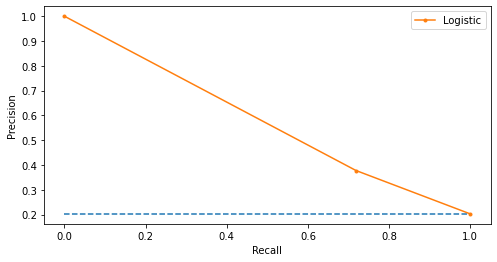

In [20]:
mr_precision = np.mean(y_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pred4)


plt.figure(figsize=(8,4))
plt.plot([0, 1], [mr_precision, mr_precision], linestyle='--')
plt.plot(lr_recall, lr_precision, marker='.', label = 'Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

auc4 = auc(lr_recall, lr_precision)

results4 = create_model_results('model4', mr4, r4, p4, f1_4, auc4)
results.append(results4)


print("AUC for precision-recall curve:", auc4)
print("AP score:", average_precision_score(y_test, y_pred4))

In [21]:
results_table = pd.DataFrame(results)

results_table.set_index("model", inplace=True)

print(results_table)

            MR    recall  precision  f1_score  auc_score
model                                                   
model1  0.1910  0.180247   0.593496  0.276515   0.457425
model2  0.2940  0.716049   0.380079  0.496575   0.441291
model3  0.2955  0.718519   0.378906  0.496164   0.441426
model4  0.2970  0.718519   0.377432  0.494898   0.576475
